## Input modules

In [1]:
# !pip install -U  statsmodels
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Get the data

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

df = df[df['iso_code']=='NPL']
df['total_cases'].fillna(0, inplace=True)

df = df[['total_cases','date']]

df.rename(columns={'date':'Date','total_cases':'Cases'}, inplace=True)
df['Date']   = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.reset_index(inplace=True)

Text(0.5, 1.0, 'Increase in COVID-19 Cases vs Date in Nepal')

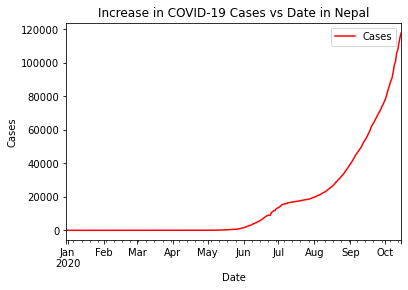

In [3]:
# Plot the graph
df.plot(x='Date', y='Cases', color='r')
plt.ylabel('Cases')
plt.title('Increase in COVID-19 Cases vs Date in Nepal')

## 1) We split the data set into train and test sets
## 2) Train set has all the data except last 7 days 
## 3) Test set has only the data from last 7 days
## 4) We train on all the data except 7 days and try to predict the last 7 days data

In [4]:
train, test = df.iloc[:-7,:], df.iloc[-7:, :]
test_start, test_end = test.index.start, test.index.stop -1

## I am using Autoregressive Forecast Model to forecast the confirmed cases
## Iterate to find the value of lags

In [5]:
score = []
for i in range(0,100):
  model = AutoReg(train['Cases'], lags=i)
  model_fit = model.fit()

  predictions = model_fit.predict(start=test_start, end=test_end)

  score.append(( r2_score(test['Cases'], predictions, multioutput='uniform_average'), i))

print('Best accuracy with lags')
sorted(score, reverse=True)[0]

Best accuracy with lags


(0.9654086126999248, 91)

## The actual module with the obtained lags

R2 Score is :
0.9654086126999248

Details on that
Actual no. of cases was 98617, Model predicted 97225 
Actual no. of cases was 100676, Model predicted 100560 
Actual no. of cases was 105684, Model predicted 103490 
Actual no. of cases was 107755, Model predicted 106946 
Actual no. of cases was 111802, Model predicted 110432 
Actual no. of cases was 115358, Model predicted 114173 
Actual no. of cases was 117996, Model predicted 118450 



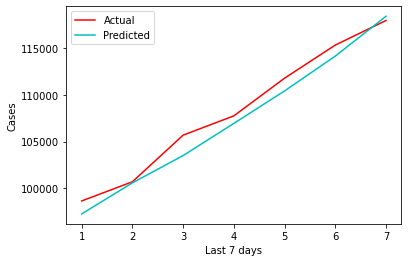

In [6]:
model = AutoReg(train['Cases'], lags=91)
model_fit = model.fit()

# Precdition is done for the range of test values
predictions = model_fit.predict(start=test_start, end=test_end)

print('R2 Score is :')
print( r2_score(test['Cases'], predictions, multioutput='uniform_average'))
print()
print('Details on that')

for real, pred in zip(test['Cases'].values, predictions.values):
  print('Actual no. of cases was {}, Model predicted {} '.format(int(real), int(pred)))

print()

# Plot the graph
plt.plot([1,2,3,4,5,6,7], test['Cases'].values, color='r', label='Actual')
plt.plot([1,2,3,4,5,6,7], predictions.values, color='c', label = 'Predicted')
plt.xlabel('Last 7 days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [7]:
predictions

283     97225.391016
284    100560.984038
285    103490.540146
286    106946.075300
287    110432.761115
288    114173.284608
289    118450.264198
dtype: float64

## Now same approach can be use to predict the cases for tommorrow cases

In [8]:
model = AutoReg(df['Cases'], lags=91) # train on whole data
model_fit = model.fit()

# Precdition is done for the range of test values
predictions = model_fit.predict(start=df.shape[0], end=df.shape[0])

In [9]:
print('Predicted cases for tomorrow is',int(predictions.values), 'cases')

Predicted cases for tomorrow is 123731 cases
